In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
import pandas as pd
import json

In [2]:
def write_dict_to_file(dict_to_write):
    with open("result.txt","w") as files:
        files.write("\n Result from ML :\n")
        files.write(json.dumps(dict_to_write))

def load_csv(path_to_csv): 
    df_read = []
    try:
        df_read = pd.read_csv(path_to_csv,encoding="utf-8")
    except Exception as e:
        print("Found Exception : {0}".format(e))
    
    return df_read
def prepare_test_x(pandas_df): return pandas_df.drop("cardio", axis=1,inplace=True)
def prepare_train_y(pandas_df): return pandas_df['cardio']

In [44]:
df_csv=[]
x_train = []
scores= { }
    
#load csv for cardio
dfCardio = load_csv("cleanCardio.csv")

In [47]:
dfCardio['gender'] = dfCardio['gender'].replace(to_replace = ['F','M'],value = ['2','1'])
dfCardio.drop("id",axis=1, inplace=True)
dfCardio

,age,gender,height,BMI,Obeso,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,44,2,157,20.69,0,51.0,100,70,2,1,0,0,1,1
1,58,1,157,20.69,0,51.0,120,80,1,1,1,0,1,0
2,50,2,159,20.17,0,51.0,100,70,1,1,0,0,1,0
3,53,1,163,19.20,0,51.0,140,90,1,1,1,0,1,1
4,43,2,155,21.23,0,51.0,100,70,2,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53539,45,1,173,36.09,1,108.0,125,80,1,1,1,1,1,0
53540,54,1,175,35.27,1,108.0,130,80,3,1,1,0,1,1
53541,61,2,158,43.26,1,108.0,140,90,2,1,0,0,1,1
53542,46,2,154,45.54,1,108.0,120,80,1,1,0,0,0,1


In [48]:
#prepare dataset for train and test
y = dfCardio['cardio']

In [49]:
x = dfCardio.drop('cardio',axis = 1, inplace=False)

In [50]:
y

0        1
1        0
2        0
3        1
4        0
        ..
53539    0
53540    1
53541    1
53542    1
53543    1
Name: cardio, Length: 53544, dtype: int64

In [51]:
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [52]:
x_train

,age,gender,height,BMI,Obeso,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
3944,54,2,160,22.66,0,58.0,120,80,1,1,0,0,0
48827,53,1,175,30.37,1,93.0,160,90,3,1,0,0,1
7305,53,1,160,23.44,0,60.0,120,80,1,1,0,0,1
30570,58,1,176,24.54,0,76.0,120,80,2,1,1,1,1
36401,63,2,155,33.30,1,80.0,140,90,2,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,63,2,156,25.89,1,63.0,120,80,3,2,0,0,1
44732,62,1,170,30.10,1,87.0,150,90,2,1,0,0,1
38158,54,1,172,27.04,1,80.0,150,80,1,1,1,1,1
860,61,2,161,20.45,0,53.0,140,90,2,1,0,0,1


In [53]:
x_train = normalize(x_train)
x_test =  normalize(x_test)
    
x = normalize(x)

In [54]:
for key, value in models.items():
    model = value
    model.fit(x_train, y_train)
    scores[key] = model.score(x_test, y_test)

write_dict_to_file(scores)

In [55]:
scores

{'Decision tree': 0.6362872350359511,
 'Random forest': 0.7076290970211971,
 'KNN': 0.7190213838827155,
 'SVM': 0.7064151648146418,
 'Naive bayes': 0.7075357176206929}

In [42]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn import svm
#don't launch function svc_param_selection ! 
def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(svm.SVC(kernel='rbf',C=1), param_grid, cv=nfolds,n_jobs=-1)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

In [43]:
print(svc_param_selection(x,y,5))

{'C': 10, 'gamma': 0.001}


In [15]:
x_train

array([[0.23412085, 0.00867114, 0.69369139, ..., 0.        , 0.        ,
        0.        ],
       [0.19134904, 0.00361036, 0.63181286, ..., 0.        , 0.        ,
        0.00361036],
       [0.22943415, 0.00432895, 0.69263139, ..., 0.        , 0.        ,
        0.00432895],
       ...,
       [0.20626595, 0.00381974, 0.65699524, ..., 0.00381974, 0.00381974,
        0.00381974],
       [0.24783809, 0.00812584, 0.65413005, ..., 0.        , 0.        ,
        0.00406292],
       [0.19747318, 0.00394946, 0.66745934, ..., 0.        , 0.        ,
        0.00394946]])

In [15]:
#from here prof.
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [16]:
model = XGBClassifier(silent=True, 
                      scale_pos_weight=1,
                      learning_rate=0.1,  
                      colsample_bytree = 0.4,
                      subsample = 0.99,
                      objective='binary:logistic', 
                      n_estimators=100, 
                      reg_alpha = 0.3,
                      max_depth=10, 
                      gamma=5)
model.fit(x_train, y_train)
# make predictions for test data
y_pred = model.predict(x_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 73.13%


In [17]:
data_dmatrix = xgb.DMatrix(data=x,label=y)

NameError: name 'xgb' is not defined

In [ ]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

In [ ]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

In [19]:
import matplotlib.pyplot as plt

xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [180, 120]
plt.show()

NameError: name 'xgb' is not defined

In [45]:
# use feature importance for feature selection
from numpy import loadtxt
from numpy import sort
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
model = XGBClassifier()
model.fit(x_train, y_train)
# make predictions for test data and evaluate
y_pred = model.predict(x_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# Fit model using each importance as a threshold
thresholds = sort(model.feature_importances_)
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(model, threshold=thresh, prefit=True)
    select_X_train = selection.transform(x_train)
    # train model
    selection_model = XGBClassifier()
    selection_model.fit(select_X_train, y_train)
    # eval model
    select_X_test = selection.transform(x_test)
    y_pred = selection_model.predict(select_X_test)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(y_test, predictions)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

Accuracy: 73.57%
Thresh=0.006, n=13, Accuracy: 73.57%
Thresh=0.007, n=12, Accuracy: 73.64%
Thresh=0.008, n=11, Accuracy: 73.51%
Thresh=0.011, n=10, Accuracy: 73.67%
Thresh=0.017, n=9, Accuracy: 73.40%
Thresh=0.035, n=8, Accuracy: 73.30%
Thresh=0.037, n=7, Accuracy: 73.28%
Thresh=0.039, n=6, Accuracy: 73.20%
Thresh=0.057, n=5, Accuracy: 72.72%
Thresh=0.080, n=4, Accuracy: 72.62%
Thresh=0.096, n=3, Accuracy: 71.18%
Thresh=0.135, n=2, Accuracy: 70.50%
Thresh=0.471, n=1, Accuracy: 69.63%


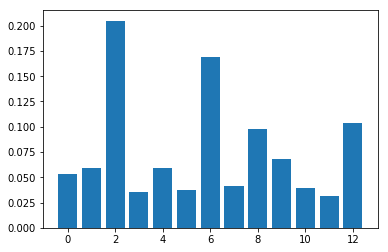

In [20]:
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
pyplot.show()

Choose predictors (not id and target)

In [29]:
predictors = [x for x in dfCardio.columns if x not in "cardio"]
target = "cardio"

In [36]:
#Import libraries:
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import metrics   #Additional scklearn functions
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(select_X_train[predictors],select_X_train[target])
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

NameError: name 'select_X_train' is not defined

In [58]:
from sklearn.datasets import load_svmlight_file
from xgboost_tuner.tuner import tune_xgb_params

In [59]:
#problem with this function -- federico
train, label = load_svmlight_file('cleanCardio.csv')

ValueError: could not convert string to float: b'id,age,gender,height,BMI,Obeso,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio'